In [ ]:
# http://localhost:8888/?token=7d7b0a0f980f752a196433d3735be87cbb86eb7584d7119b
# https://towardsdatascience.com/how-to-create-maps-in-plotly-with-non-us-locations-ca974c3bc997

In [ ]:
# conda install geopandas

In [110]:
# pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

In [3]:
lga_gdf = gpd.read_file('Resources/VIC_LGA_POLYGON_SHP_GDA2020.shp') #load the data using Geopandas
# lga_gdf = lga_gdf[lga_gdf['STE_NAME16']=='Victoria'] #Select the data for the state of Victoria
# lga_gdf['LGA_CODE20'] = lga_gdf['LGA_CODE20'].astype('str') # we will join on this axis, so both dataframes need this to be the same type
lga_gdf.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,LGA_NAME,ABB_NAME,DT_GAZETD,STATE_PID,geometry
0,465,2017-09-08,None,VIC246,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12998, 146.46062 -37.1..."
1,484,2017-09-08,None,VIC230,GOLDEN PLAINS SHIRE,GOLDEN PLAINS,None,2,"POLYGON ((144.08424 -38.11004, 144.08379 -38.1..."
2,491,2017-09-08,None,VIC190,MOIRA SHIRE,MOIRA,None,2,"POLYGON ((146.21054 -36.11528, 146.21009 -36.1..."
3,502,2017-09-08,None,VIC205,DAREBIN CITY,DAREBIN,None,2,"POLYGON ((144.98381 -37.76402, 144.98367 -37.7..."
4,504,2017-09-08,None,VIC207,MAROONDAH CITY,MAROONDAH,None,2,"POLYGON ((145.28728 -37.83331, 145.28727 -37.8..."


In [100]:

lga_gdf['LGA_PID'] = lga_gdf['LGA_PID'].str.extract(r'(\d+)', expand=False)
lga_gdf['LGA_PID']=lga_gdf[["LGA_PID","LGA_NAME","geometry"]]
lga_gdf['LGA_PID'] = lga_gdf['LGA_PID'].astype('float')
lga_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LG_PLY_PID  92 non-null     object  
 1   DT_CREATE   92 non-null     object  
 2   DT_RETIRE   0 non-null      object  
 3   LGA_PID     92 non-null     float64 
 4   LGA_NAME    92 non-null     object  
 5   ABB_NAME    92 non-null     object  
 6   DT_GAZETD   0 non-null      object  
 7   STATE_PID   92 non-null     object  
 8   geometry    92 non-null     geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 6.6+ KB


In [10]:
school_data = pd.read_csv('Resources/school list 2021.csv',encoding='cp1252')
school_data.head()

,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [7]:
#Call 2021 Property sales stats
Stat_21 = pd.read_csv('Resources/yearly_data_clean_2021.csv',encoding='cp1252')
Stat_21.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,1220000.0,75.0,2810000.0,735000.0,863000.0,1025000.0,1445000.0,...,1200000.0,89.0,2625000.0,499000.0,49.0,32.0,610.0,204.0,1300.0,320.0
1,3040,Aberfeldie,647,1360000.0,223.0,4000000.0,283000.0,545000.0,1000000.0,1811000.0,...,1250000.0,295.0,7000000.0,280000.0,147.0,92.0,495.0,419.0,1250.0,230.0
2,3042,Airport West,757,1050000.0,99.0,2870000.0,600000.0,710000.0,849000.0,1265000.0,...,965000.0,115.0,2900000.0,590000.0,65.0,40.0,500.0,135.0,1100.0,280.0
3,3021,Albanvale,787,613000.0,336.0,1550000.0,330000.0,450000.0,555000.0,685000.0,...,599000.0,506.0,1460000.0,55000.0,91.0,43.0,350.0,655.0,1593.0,170.0
4,3206,Albert Park,797,2680000.0,49.0,8600000.0,1235000.0,1525000.0,2250000.0,3575000.0,...,2600000.0,65.0,9750000.0,1300000.0,35.0,19.0,800.0,99.0,1900.0,330.0


In [57]:

school_reduced=school_data[["Education_Sector","SCHOOL_NO","School_Name","School_Type","Address_Line_1","Address_Town","Address_Postcode","LGA_ID","LGA_Name","X","Y"]]
school_reduced.head()


,Education_Sector,SCHOOL_NO,School_Name,School_Type,Address_Line_1,Address_Town,Address_Postcode,LGA_ID,LGA_Name,X,Y
0,Government,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,681,Wellington (S),146.666601,-38.617713
1,Government,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,673,Warrnambool (C),142.590393,-38.386281
2,Government,4,Avoca Primary School,Primary,118 Barnett Street,Avoca,3467,599,Pyrenees (S),143.475649,-37.084502
3,Government,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,643,Strathbogie (S),145.234722,-36.901368
4,Government,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,421,Manningham (C),145.213980,-37.742675


In [74]:
rename_school=school_reduced.rename(columns={"Education_Sector":"Education sector",
                                     "SCHOOL_NO":"School number",
                                     "School_Name":"Name",
                                     "School_Type":"Type",
                                     "Address_Line_1":"Address",
                                     "Address_Town":"Town/city",
                                     "Address_Postcode":"Postcode",
                                     "LGA_ID":"LGA_PID",
                                     "X":"Longitude",
                                     "Y":"Latitude",})
rename_school.head()



,Education sector,School number,Name,Type,Address,Town/city,Postcode,LGA_PID,LGA_Name,Longitude,Latitude
0,Government,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,681,Wellington (S),146.666601,-38.617713
1,Government,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,673,Warrnambool (C),142.590393,-38.386281
2,Government,4,Avoca Primary School,Primary,118 Barnett Street,Avoca,3467,599,Pyrenees (S),143.475649,-37.084502
3,Government,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,643,Strathbogie (S),145.234722,-36.901368
4,Government,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,421,Manningham (C),145.213980,-37.742675


In [59]:
rename_school.to_csv('Resources/school list clean.csv',encoding='utf-8',index=False,header=True)


In [116]:
#merge data
combined_df=pd.merge(rename_school,Stat_21,how="inner",on="Postcode")
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education sector         2308 non-null   object 
 1   School number            2308 non-null   int64  
 2   Name                     2308 non-null   object 
 3   Type                     2308 non-null   object 
 4   Address                  2308 non-null   object 
 5   Town/city                2308 non-null   object 
 6   Postcode                 2308 non-null   int64  
 7   LGA_PID                  2308 non-null   int64  
 8   LGA_Name                 2308 non-null   object 
 9   Longitude                2308 non-null   float64
 10  Latitude                 2308 non-null   float64
 11  Suburb                   2308 non-null   object 
 12  ID_Domain                2308 non-null   int64  
 13  medianSoldPrice          2308 non-null   float64
 14  numberSold              

In [117]:
combined_df=combined_df[["Education sector","School number","Name","Postcode","LGA_PID","LGA_Name","Longitude","Latitude","medianSoldPrice","numberSold"]]



In [118]:
combined_df["LGA_PID"].unique()


array([421,  91, 343, 311, 534, 571,  66, 506, 460, 433, 111, 465, 735,
       698, 525, 707, 635, 726, 497, 189, 745, 327, 367, 590, 217, 161,
       441, 231, 118, 267, 145], dtype=int64)

In [119]:
grouped_combined_df=combined_df.groupby(['Postcode'])
print(grouped_combined_df)
grouped_combined_df.count().head(10)

,Education sector,School number,Name,LGA_PID,LGA_Name,Longitude,Latitude,medianSoldPrice,numberSold
Postcode,,,,,,,,,
3003,1,1,1,1,1,1,1,1,1
3008,1,1,1,1,1,1,1,1,1
3011,12,12,12,12,12,12,12,12,12
3012,15,15,15,15,15,15,15,15,15
3013,5,5,5,5,5,5,5,5,5
3015,18,18,18,18,18,18,18,18,18
3016,12,12,12,12,12,12,12,12,12
3018,10,10,10,10,10,10,10,10,10
3019,6,6,6,6,6,6,6,6,6


In [120]:
#Count shool number under all postcodes
school_count=grouped_combined_df["Postcode"].count()
school_count

Postcode
3003      1
3008      1
3011     12
3012     15
3013      5
       ... 
3939      5
3941      4
3943      2
3976      6
3977    208
Name: Postcode, Length: 170, dtype: int64

In [121]:
school_count_df=pd.DataFrame(school_count)
school_count_df=school_count_df.rename(columns={"Postcode":"School count"})
school_count_df.reset_index()

,Postcode,School count
0,3003,1
1,3008,1
2,3011,12
3,3012,15
4,3013,5
...,...,...
165,3939,5
166,3941,4
167,3943,2
168,3976,6


In [122]:
combined_shool_count=pd.merge(school_count_df,combined_df,how="outer",on="Postcode")
combined_shool_count['medianSoldPrice'] = combined_shool_count['medianSoldPrice'].fillna(0)
combined_shool_count.head(10)

,Postcode,School count,Education sector,School number,Name,LGA_PID,LGA_Name,Longitude,Latitude,medianSoldPrice,numberSold
0,3003,1,Catholic,25,Simonds Catholic College,460,Melbourne (C),144.952883,-37.805971,1110000.0,43.0
1,3008,1,Government,5573,Docklands Primary School,460,Melbourne (C),144.940553,-37.812714,1278000.0,12.0
2,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
3,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
4,3011,12,Government,1912,Footscray City Primary School,433,Maribyrnong (C),144.900253,-37.806400,1061000.0,96.0
5,3011,12,Government,1912,Footscray City Primary School,433,Maribyrnong (C),144.900253,-37.806400,1061000.0,96.0
6,3011,12,Government,4160,Footscray North Primary School,433,Maribyrnong (C),144.883372,-37.787746,1061000.0,96.0
7,3011,12,Government,4160,Footscray North Primary School,433,Maribyrnong (C),144.883372,-37.787746,1061000.0,96.0
8,3011,12,Government,7842,Footscray High School,433,Maribyrnong (C),144.893763,-37.791043,1061000.0,96.0
9,3011,12,Government,7842,Footscray High School,433,Maribyrnong (C),144.893763,-37.791043,1061000.0,96.0


In [123]:
combined_shool_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          2308 non-null   int64  
 1   School count      2308 non-null   int64  
 2   Education sector  2308 non-null   object 
 3   School number     2308 non-null   int64  
 4   Name              2308 non-null   object 
 5   LGA_PID           2308 non-null   int64  
 6   LGA_Name          2308 non-null   object 
 7   Longitude         2308 non-null   float64
 8   Latitude          2308 non-null   float64
 9   medianSoldPrice   2308 non-null   float64
 10  numberSold        2308 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 216.4+ KB


In [124]:
combined_shool_count_clean=combined_shool_count.dropna(subset=["LGA_PID"],inplace=False)
combined_shool_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          2308 non-null   int64  
 1   School count      2308 non-null   int64  
 2   Education sector  2308 non-null   object 
 3   School number     2308 non-null   int64  
 4   Name              2308 non-null   object 
 5   LGA_PID           2308 non-null   int64  
 6   LGA_Name          2308 non-null   object 
 7   Longitude         2308 non-null   float64
 8   Latitude          2308 non-null   float64
 9   medianSoldPrice   2308 non-null   float64
 10  numberSold        2308 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 216.4+ KB


In [125]:
combined_shool_count_clean.head()

,Postcode,School count,Education sector,School number,Name,LGA_PID,LGA_Name,Longitude,Latitude,medianSoldPrice,numberSold
0,3003,1,Catholic,25,Simonds Catholic College,460,Melbourne (C),144.952883,-37.805971,1110000.0,43.0
1,3008,1,Government,5573,Docklands Primary School,460,Melbourne (C),144.940553,-37.812714,1278000.0,12.0
2,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
3,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
4,3011,12,Government,1912,Footscray City Primary School,433,Maribyrnong (C),144.900253,-37.806400,1061000.0,96.0


In [133]:
lga_gdf.head(100)

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,LGA_NAME,ABB_NAME,DT_GAZETD,STATE_PID,geometry
0,465,2017-09-08,None,246.0,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12998, 146.46062 -37.1..."
1,484,2017-09-08,None,230.0,GOLDEN PLAINS SHIRE,GOLDEN PLAINS,None,2,"POLYGON ((144.08424 -38.11004, 144.08379 -38.1..."
2,491,2017-09-08,None,190.0,MOIRA SHIRE,MOIRA,None,2,"POLYGON ((146.21054 -36.11528, 146.21009 -36.1..."
3,502,2017-09-08,None,205.0,DAREBIN CITY,DAREBIN,None,2,"POLYGON ((144.98381 -37.76402, 144.98367 -37.7..."
4,504,2017-09-08,None,207.0,MAROONDAH CITY,MAROONDAH,None,2,"POLYGON ((145.28728 -37.83331, 145.28727 -37.8..."
...,...,...,...,...,...,...,...,...,...
87,689,2019-09-06,None,221.0,WYNDHAM CITY,WYNDHAM,None,2,"POLYGON ((144.67692 -37.97334, 144.67682 -37.9..."
88,688,2019-09-06,None,219.0,LATROBE CITY,LATROBE,None,2,"POLYGON ((146.59788 -38.31360, 146.59727 -38.3..."
89,697,2019-09-06,None,198.0,HUME CITY,HUME,None,2,"POLYGON ((144.95856 -37.62957, 144.95848 -37.6..."
90,696,2019-09-06,None,197.0,WHITTLESEA CITY,WHITTLESEA,None,2,"POLYGON ((144.97497 -37.64801, 144.97493 -37.6..."


In [128]:
df_merged = pd.merge(lga_gdf[['LGA_PID', 'geometry', 'LGA_NAME']], combined_shool_count_clean[['LGA_PID', 'School count','Postcode','Name','LGA_Name','Longitude','Latitude','medianSoldPrice']], left_on='LGA_PID', right_on='LGA_PID', how='left')

df_merged = df_merged.dropna(subset=['geometry']).set_index('LGA_PID')
df_merged.describe()

,School count,Postcode,Longitude,Latitude,medianSoldPrice
count,198.000000,198.000000,198.000000,198.000000,1.980000e+02
mean,26.414141,3209.838384,145.069101,-37.935120,1.187758e+06
std,39.259002,203.961737,0.066483,0.156099,4.022055e+05
min,3.000000,3070.000000,144.985377,-38.174436,4.900000e+05
25%,8.000000,3085.000000,145.018731,-38.117707,9.060000e+05
50%,13.000000,3185.000000,145.040738,-37.902061,1.208000e+06
75%,33.000000,3200.750000,145.137835,-37.780069,1.647000e+06
max,208.000000,3977.000000,145.205019,-37.696666,1.913000e+06


(140.51119005003704,
 150.42701530246796,
 -39.39433283027547,
 -33.723504498771526)

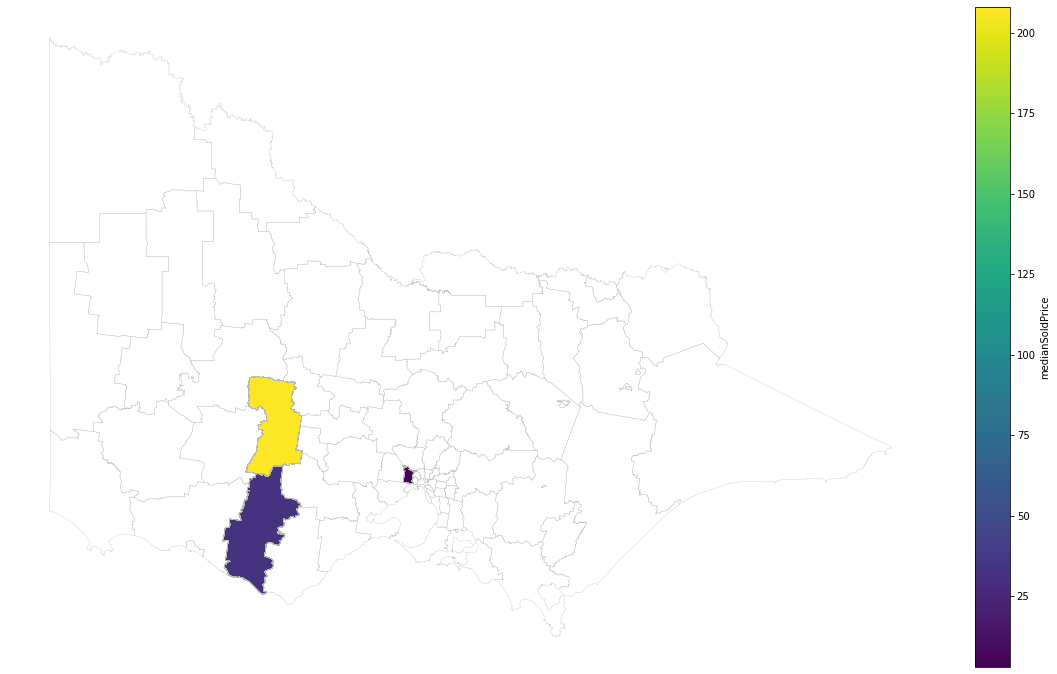

In [132]:
# OPTIONAL: Display using geopandas
fig, ax = plt.subplots(1,1, figsize=(20,20))
divider = make_axes_locatable(ax)
tmp = df_merged.copy()
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
tmp.plot(column='School count', ax=ax,cax=cax,  legend=True, 
         legend_kwds={'label': "medianSoldPrice"})
tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')